# OMOLOLA OGUNNAIKE
# Batch number: DS2402

Using the happiness score dataset.

#### Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

#### What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [1]:
#Import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
#Load the dataset from the system
world_hap = pd.read_csv('happiness_score_dataset.csv')

# Exploratory Data Analysis

In [3]:
#Viewing the first 10 rows of the dataset
world_hap.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


We have 2 categorical variables (Country and Region) and the other 10 are continous variables.

In [4]:
#display the dimension of our dataset
world_hap.shape

(158, 12)

This dataset contains 158 rows and 12 columns (made up of the independent and target variables)

In [5]:
#Viewing the columns present in the dataset
columns = world_hap.columns
columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
#Displays the basic information about the columns in the dataset
world_hap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

We have 2 object datatype variables, 9 float datatype variables and one integer datatype variable.

In [7]:
world_hap.describe(include='object')

,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


These are our catergorical variables. There are 158 countries grouped into 10 different regions.

In [8]:
#Displays the unique value for the features in the dataset
world_hap.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

Out of all the variables, the Region column appears to be a discrete variable. Others are continous variables

In [9]:
#displaying the descriptive statistics of all the features in the dataset
world_hap.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


From the describe above, we can see that the count for all the features are equal meaning that there are no missing values.

In [10]:
#checking for missing values
world_hap.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no missing values in our dataset

In [11]:
#This returns the count of unique occurrences in the Region column.
world_hap['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

We have more countries in the Sub-Saharan Africa region. Only two countries in the North American and Australia and New Zealand region.

C:\Users\probook 430 G3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The distribution of the Region column')

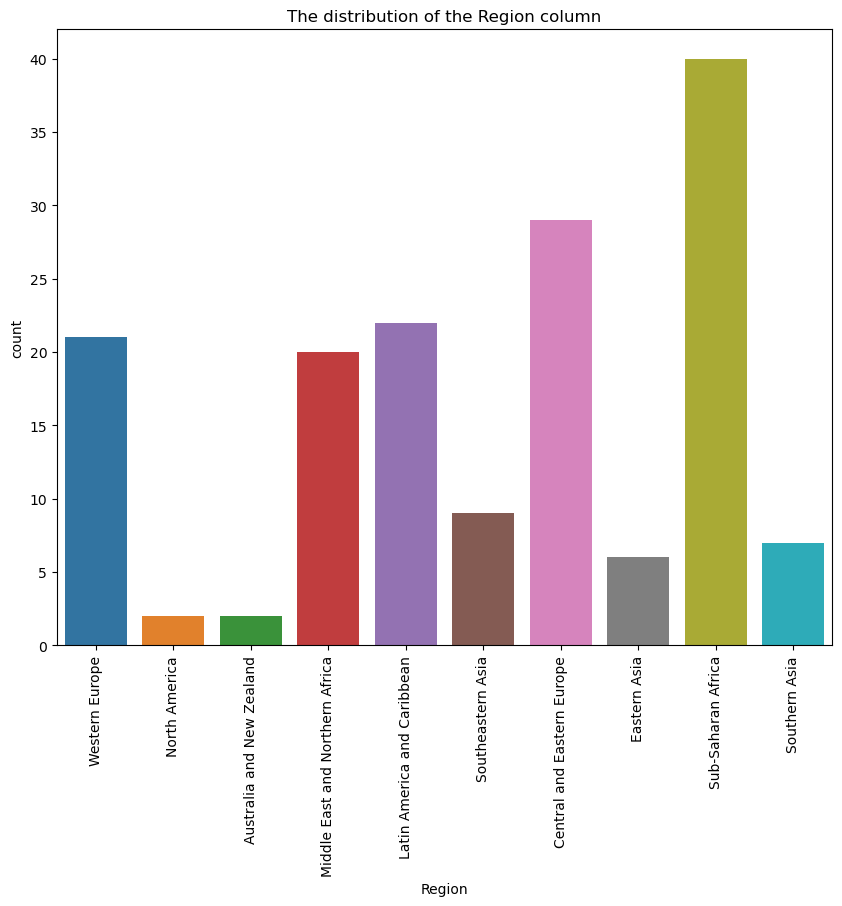

In [12]:
#Visualizing the region column
plt.figure(figsize=(10,8))
sns.countplot(world_hap['Region'])
plt.xticks(rotation = 90)
plt.title('The distribution of the Region column')

We have more countries in the Sub-Saharan Africa region

<Figure size 2000x2000 with 0 Axes>

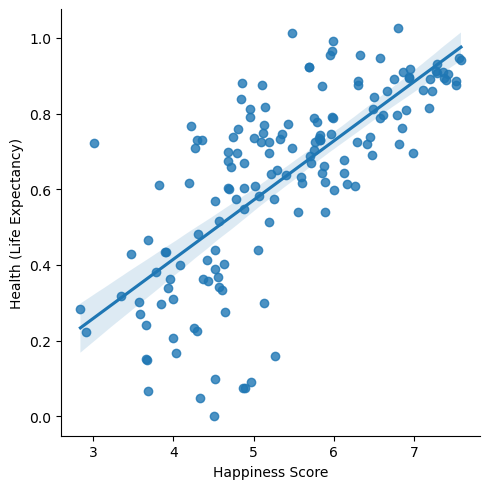

In [13]:
# lmplot showing the relationship between Health (Life Expectancy) and Happiness score
plt.figure(figsize=(20,20))
sns.lmplot(x='Happiness Score',y='Health (Life Expectancy)',data=world_hap)

The happiness score is positively correlated with Health (Life Expectancy). This is probably because people are happier when they believe they will live longer and in better health. They are not burdened with thoughts about illnesses and other things that could shorten their lives.

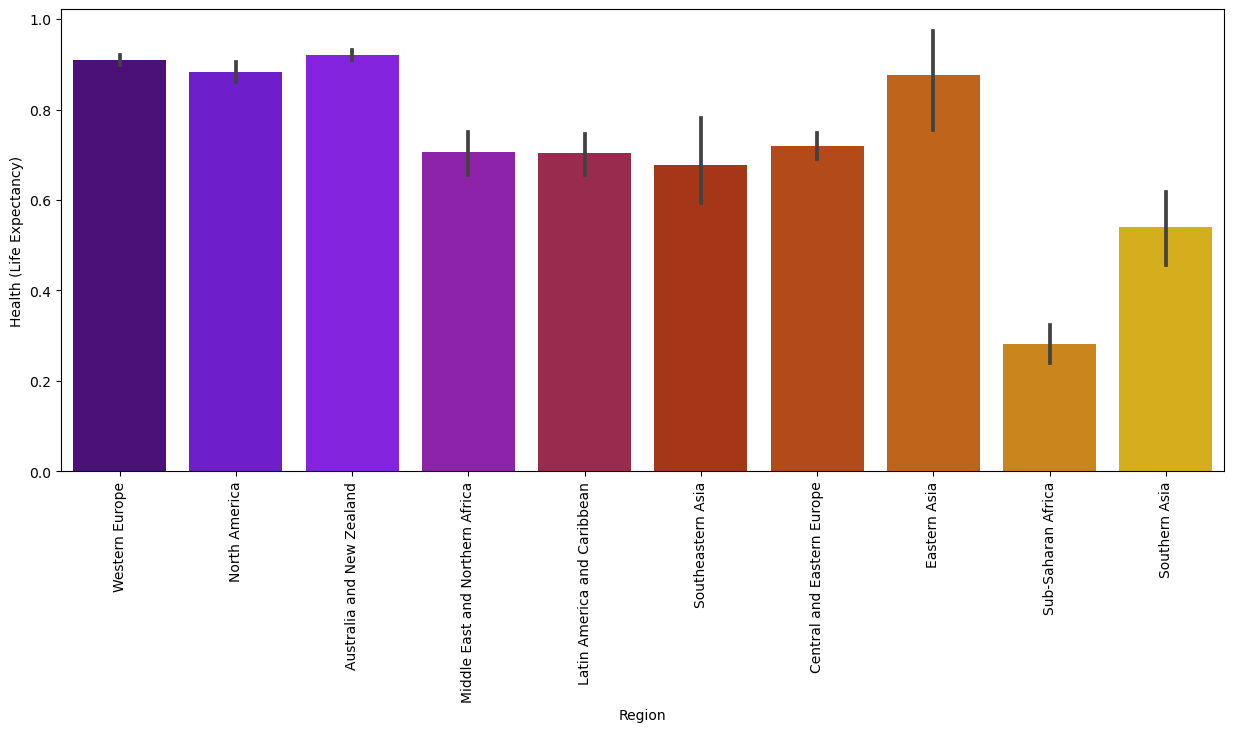

In [14]:
# barplot showing the relationship between Health (Life Expectancy) and Region
plt.figure(figsize=(15,6))
sns.barplot(x = 'Region', y = 'Health (Life Expectancy)', data = world_hap, palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Southern Asia and Sub-Saharan Africa have the lowest life expectancy rates.

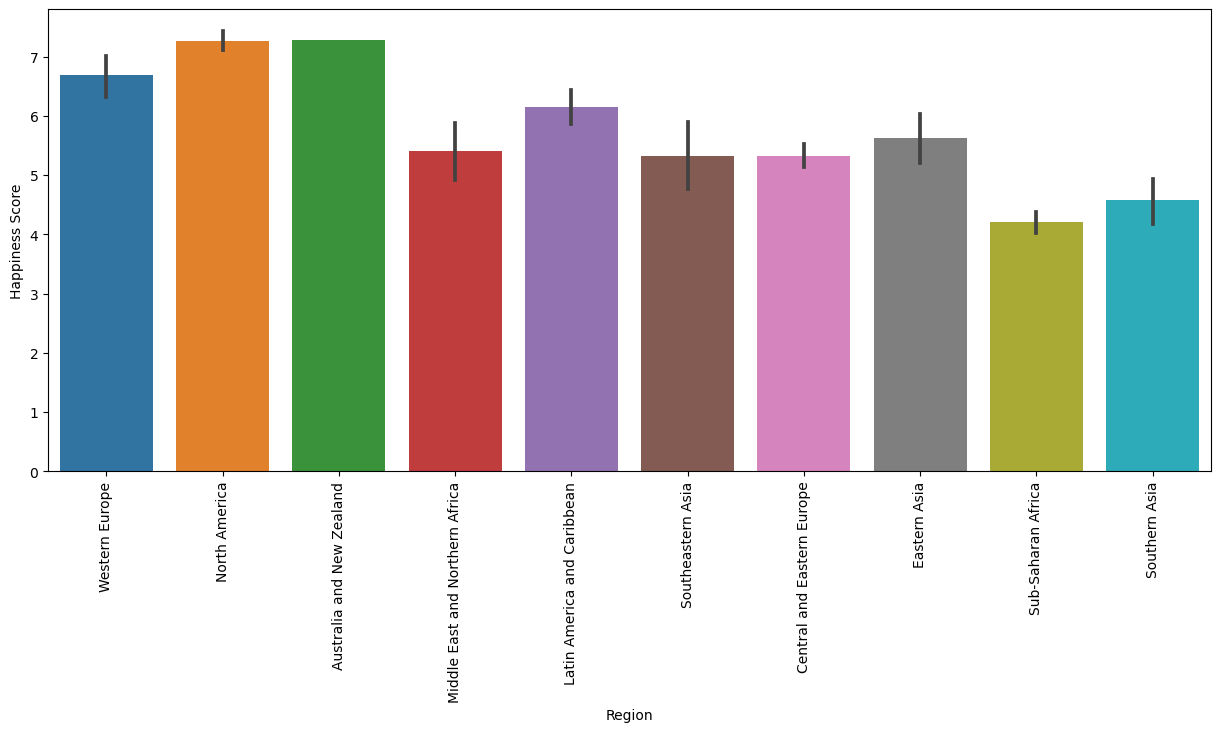

In [15]:
# barplot showing the relationship between Region and Happiness score
plt.figure(figsize = (15,6))
sns.barplot(x = 'Region',y='Happiness Score',data = world_hap)
plt.xticks(rotation = 90)
plt.show()

The highest Happiness Scores are found in North America and Australia and New Zealand.

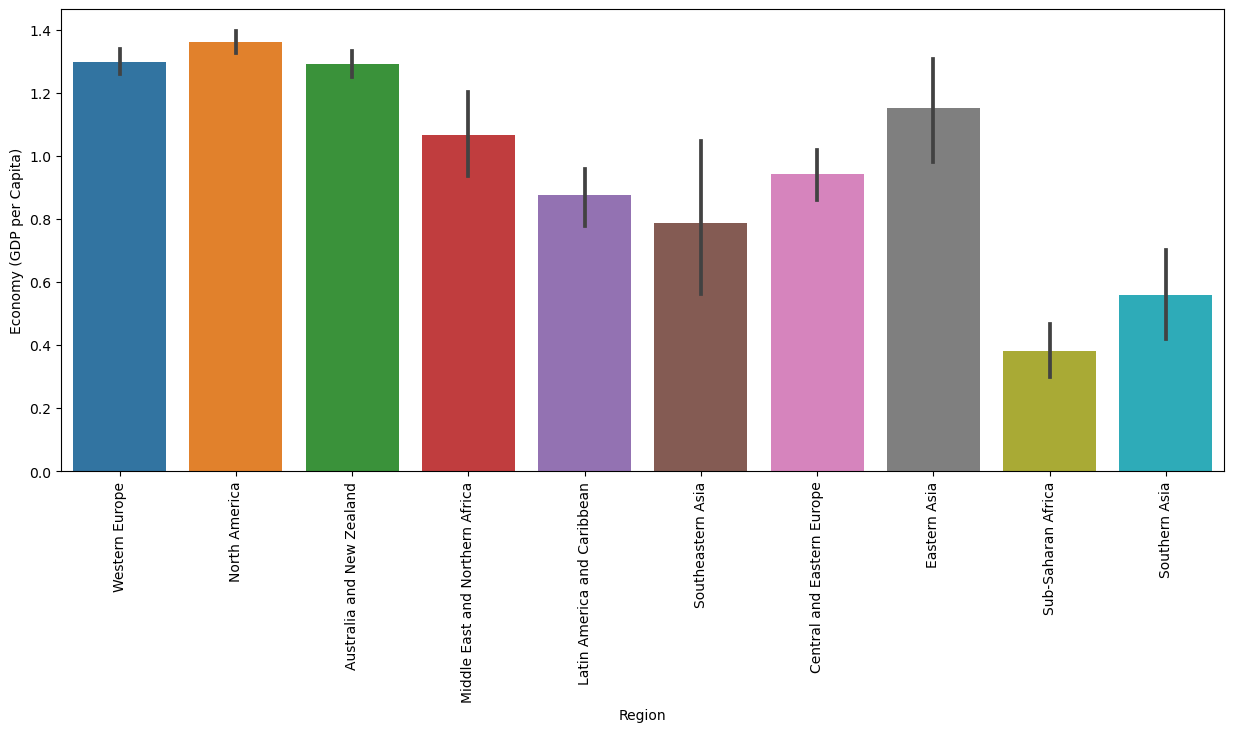

In [16]:
# barplot showing the relationship between Economy (GDP per Capita) and Region
plt.figure(figsize = (15,6))
sns.barplot(x = 'Region',y='Economy (GDP per Capita)',data = world_hap)
plt.xticks(rotation = 90)
plt.show()

The country with the highest level of satisfaction with its economy is found in North America, while Sub-Saharan Africa has the lowest score.

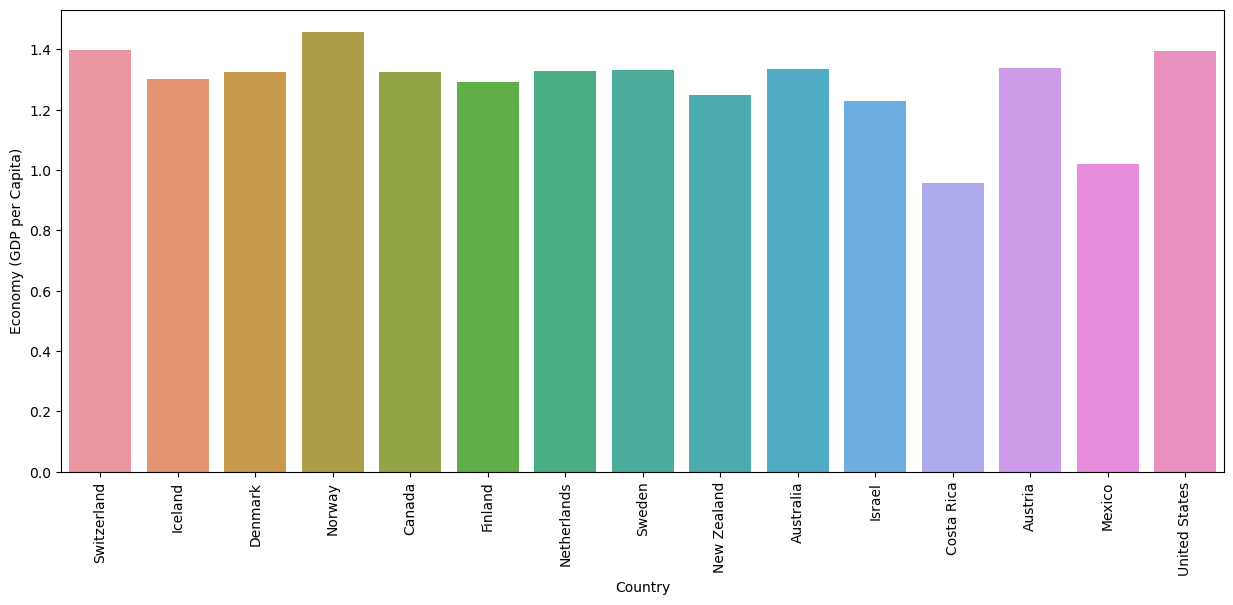

In [17]:
# barplot showing the relationship between Economy (GDP per Capita) and country
plt.figure(figsize = (15,6))
sns.barplot(x = 'Country',y='Economy (GDP per Capita)',data = world_hap.head(15))
plt.xticks(rotation = 90)
plt.show()

Looking at 15 countries GDP per capita, we could predict that countries with greater GDPs have more resources, which raises living standards and so have more money to devote to healthcare systems, enabling people to live longer and healthier lives. We can see that of the 15 countries displayed, Norway, Switzerland and United states have higher Economy (GDP per Capita).

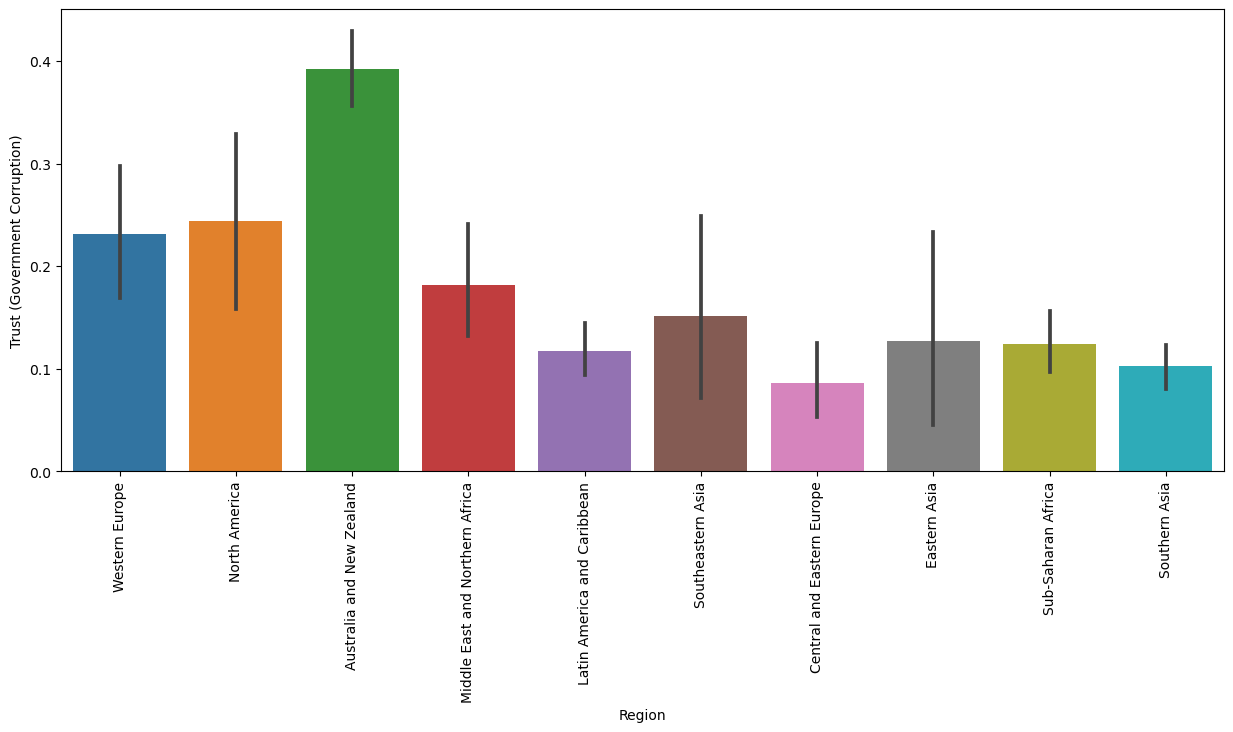

In [18]:
# barplot showing the relationship between Trust (Government Corruption and region
plt.figure(figsize = (15,6))
sns.barplot(x = 'Region',y='Trust (Government Corruption)',data = world_hap)
plt.xticks(rotation = 90)
plt.show()

Australia and New Zealand region has the highest issue with trust for their government. 

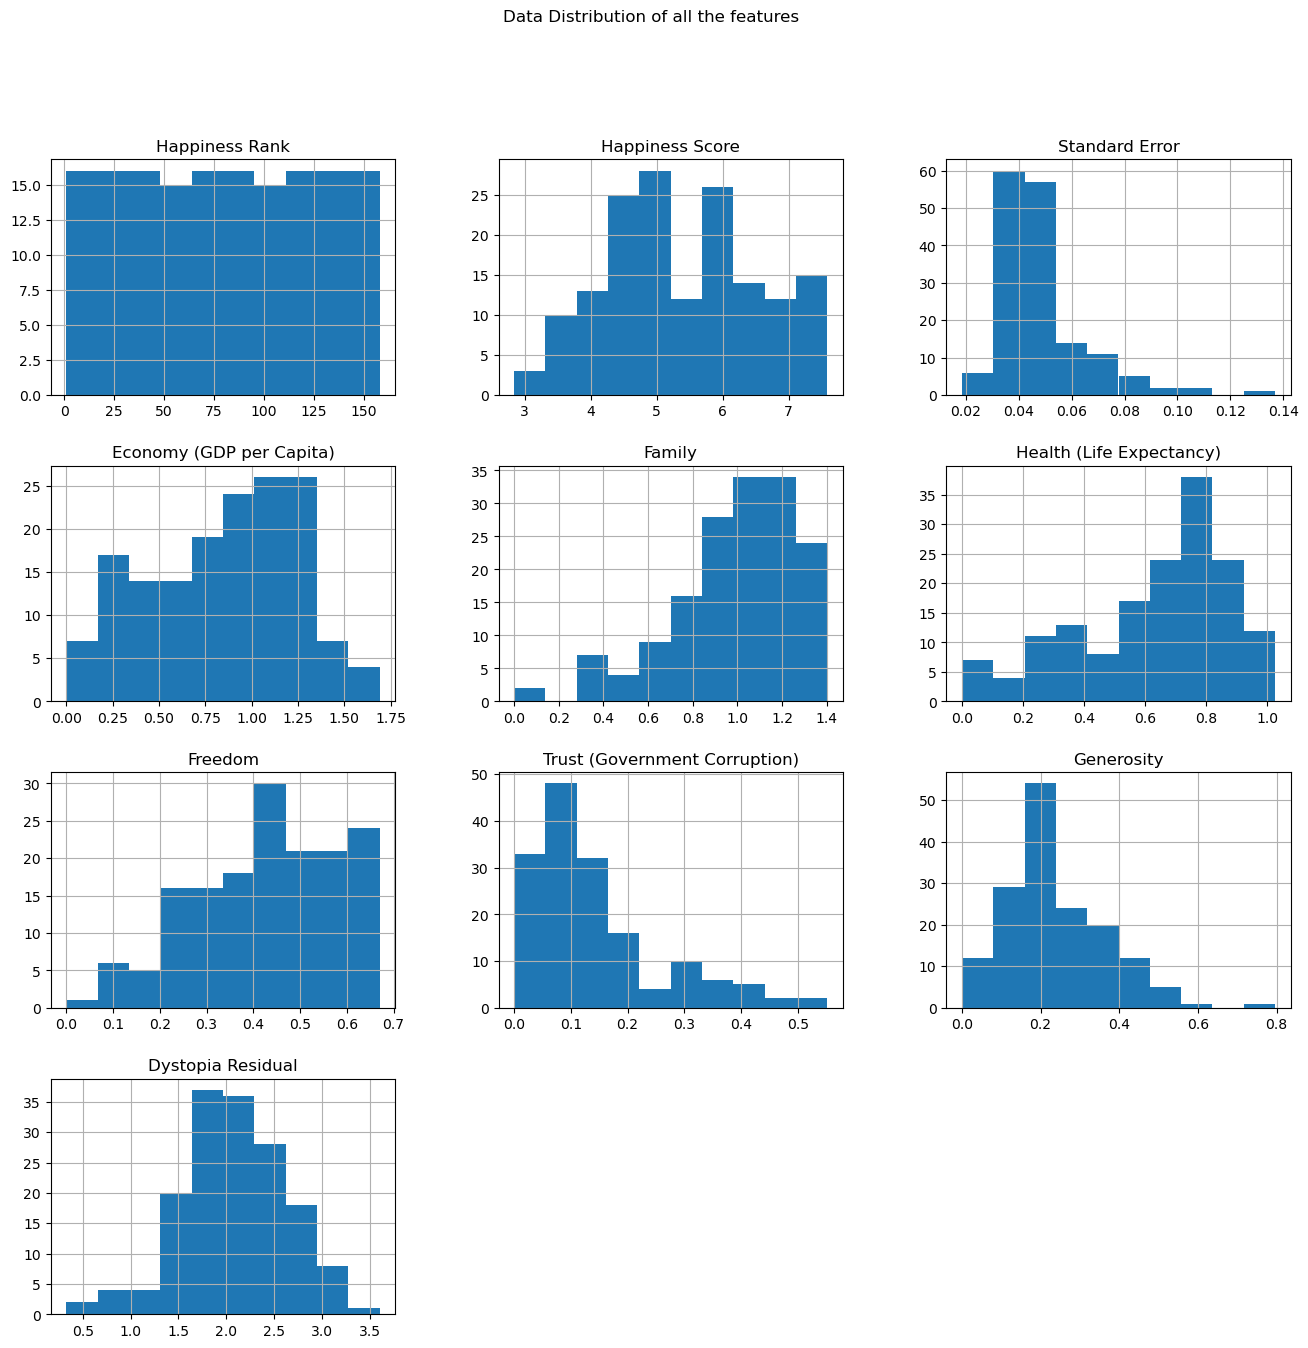

In [19]:
# Histogram containing all the columns
world_hap.hist(bins=10, figsize=(16,15))
plt.suptitle("Data Distribution of all the features")
plt.show()

From the histograms above, we can see that Dytopia Residual is normally distibuted while other a skewed. 

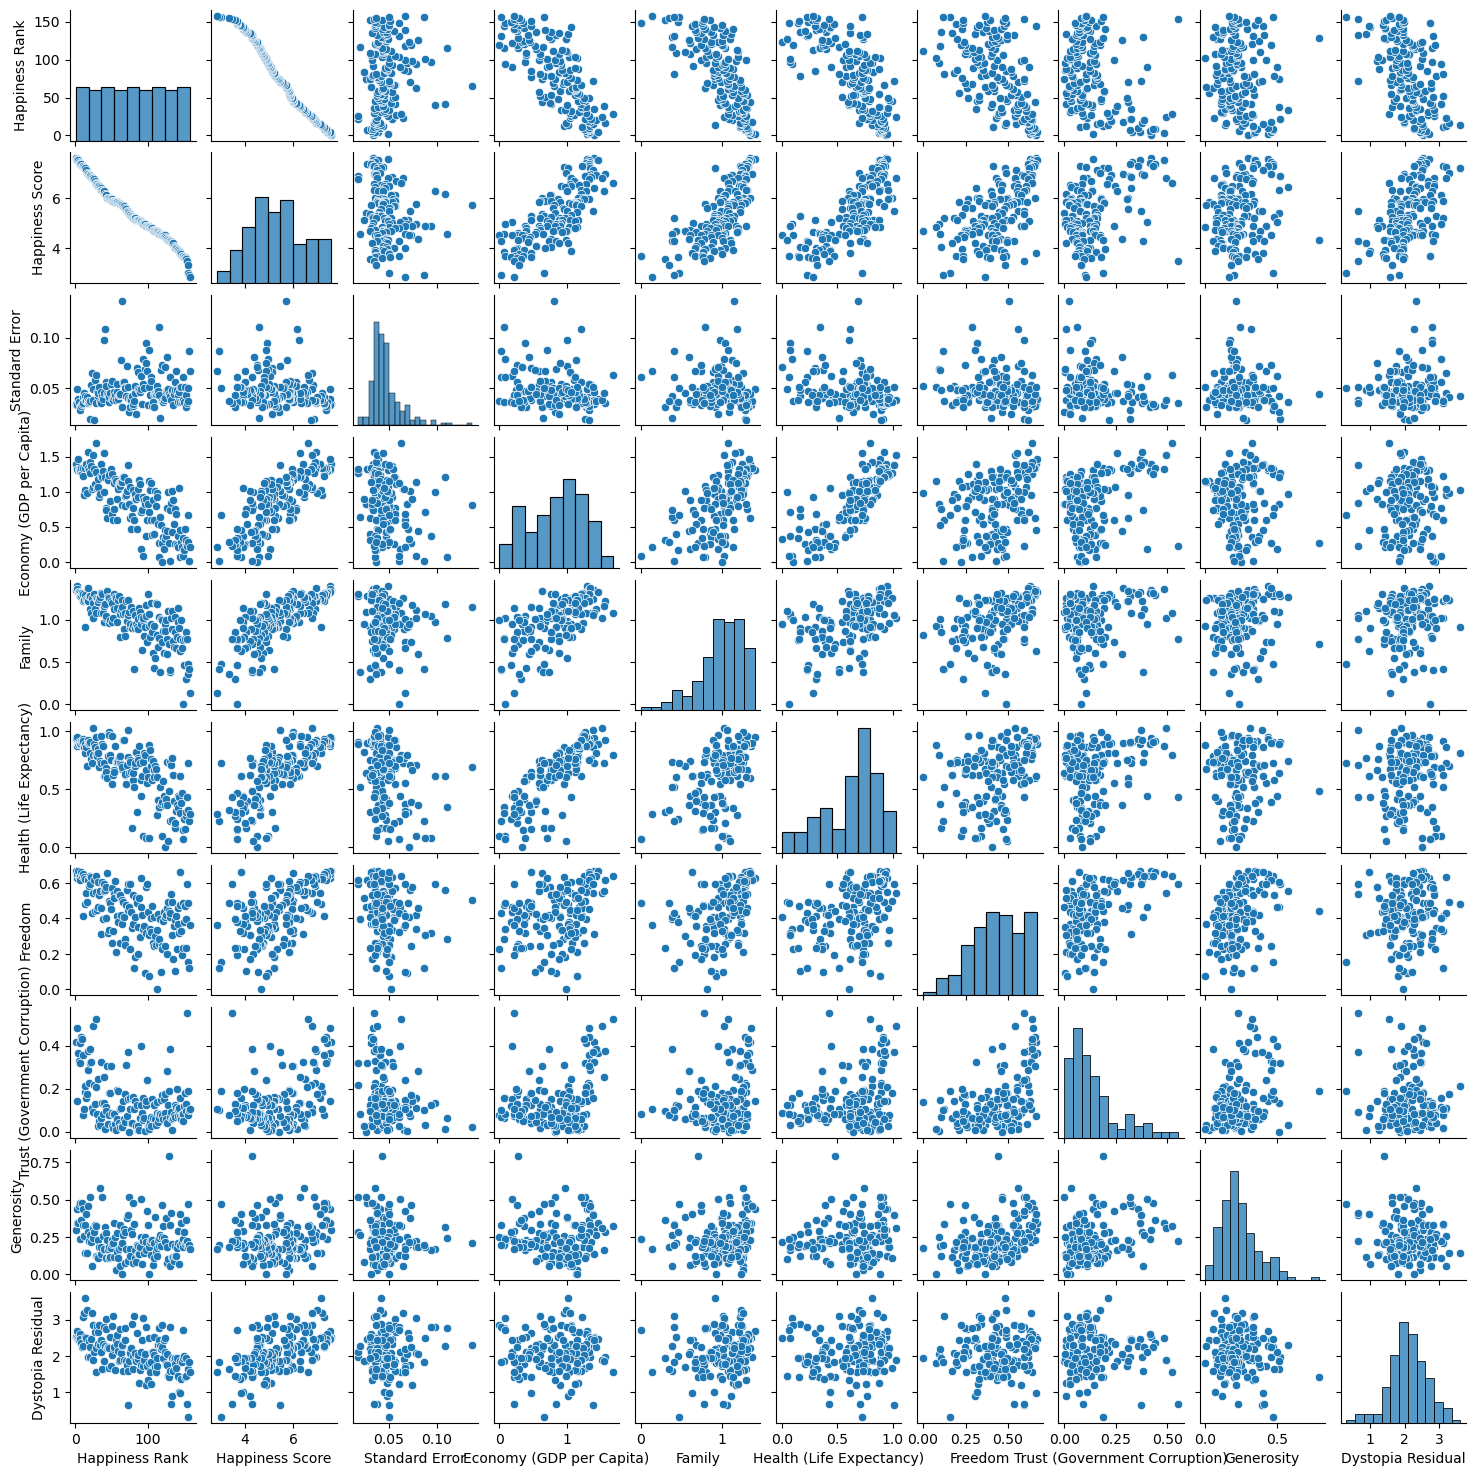

In [20]:
#pairplot showing the distribution of the variables
sns.pairplot(world_hap, diag_kind="hist", height=1.5, palette = 'husl')

From the pairplot, we can observe that Happiness Score has positive correlation with most of the independent variables. There is a strong correlation between Happiness score and GDP, family, and life expectancy; that is, as these variables increases, so does happiness.

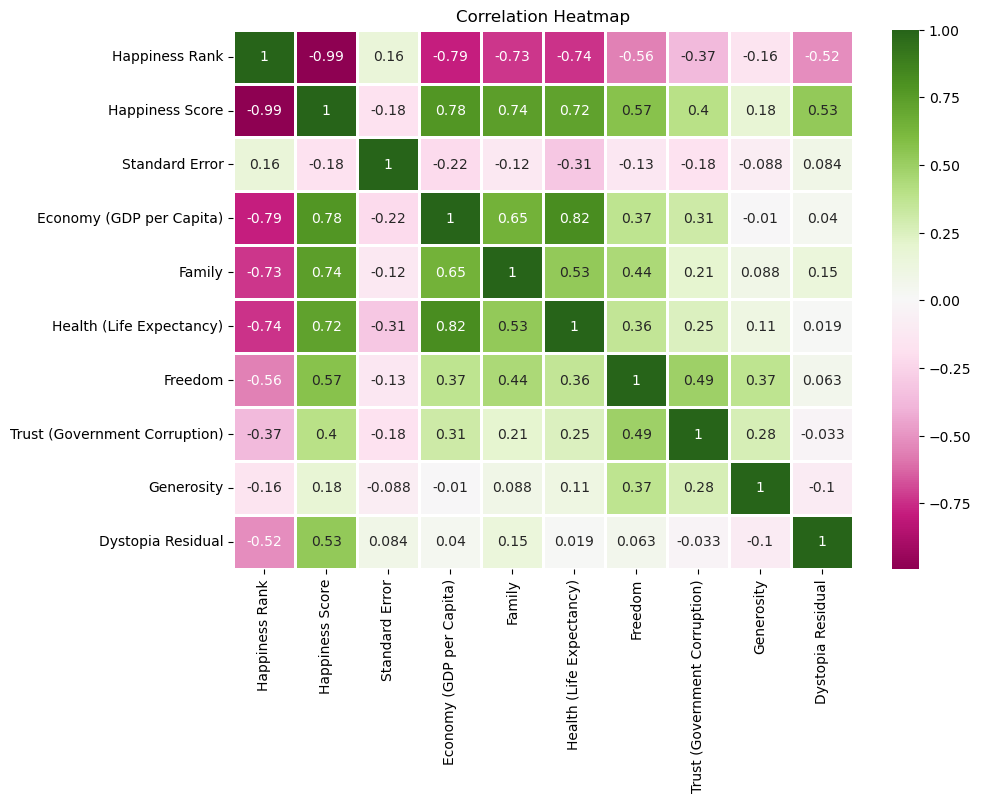

In [21]:
# Using heatmap to visualize the correlation between the numerical features.
plt.figure(figsize=(10,7))
sns.heatmap(world_hap.corr(), annot=True, linewidths = 2, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

From the heatmap, we can see that there is a multicollinearity between Healthy life expectance and Economy (GDP per Capita) with a value of 0.82. Economy, Family, Health are strongly correlated with Happiness Score, whereas Happiness Rank and standard error Score are negatively correlated. We can sat that family, health, and the economy are the three factors that have the biggest effects on happiness. We can see that the strong correlation between Economy (GDP per Capita) and Happiness Score. This is because the state of the economy, the availability of resources, and job prospects all have a big influence on how happy citizens are.

In [22]:
#nEncoding the column region
from sklearn.preprocessing import LabelEncoder
Region_encode=LabelEncoder()
world_hap['Region']=Region_encode.fit_transform(world_hap['Region'])
world_hap.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


We are using the Labelencoder to change the Region column from object to interger.

In [23]:
# Setting country as an index
world_hapnew=world_hap.set_index("Country")
world_hapnew

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Benin,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Syria,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


We do not want to drop the country instead we will set it as an index while we drop only the Happiness rank column.

In [24]:
# Separating our independent variables and target variable
X = world_hapnew.drop(['Happiness Score','Happiness Rank'],axis = 1)
y = world_hapnew['Happiness Score']

We are going to drop happiness rank since we have the Region column. We are dropping Happiness Score as independent variable and make it our target variable.

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X)
X_test=scaler.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.000000,0.131954,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,1.000000,0.256311,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,1.000000,0.124947,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,1.000000,0.171549,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.555556,0.143943,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584
...,...,...,...,...,...,...,...,...,...
153,0.888889,0.136429,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314,0.104425
154,0.888889,0.152638,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432,0.398557
155,0.444444,0.267370,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790,0.000000
156,0.888889,0.574926,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864,0.459573


We are scaling our data using the MinMaxScaler so our data are within the range 0 and 1.

In [26]:
from sklearn.model_selection import train_test_split
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((118, 9), (40, 9), (118,), (40,))

We splitted our data in X_train, X_test, y_train and y_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 75% of our data will be used to train the model while 25% will be used for model validation.

# Model Building

## 1. Gradient Boosting Regressor

In [27]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

ypred = gb.predict(X_test)
train_pred = gb.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred)
msqe = metrics.mean_squared_error(y_test, ypred)
r2_score = metrics.r2_score(y_test, ypred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_pred))
print('\n')


mean_absolute_error :  0.19319040391200376
mean_squared_error  :  0.056504074965743965
root_mean_absolute_error 0.2377058580804099
R2_score            :  0.9575437375624261
R2_score on training data :  0.9994459287035439




## 2. Random Forest Regressor

In [28]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
random_for= RandomForestRegressor()
random_for.fit(X_train, y_train)

y_pred = random_for.predict(X_test)
train_predrd = random_for.predict(X_train)
mse = metrics.mean_absolute_error(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)
r2_score = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  0.24442550000000077
mean_squared_error  :  0.08945753779000035
root_mean_absolute_error 0.29909452985636553
R2_score            :  0.9327830301843888
R2_score on training data :  0.9859771826107899




## 3. Decision Tree Regressor

In [29]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
ypred_dc = dec_tree.predict(X_test)
train_preddc = dec_tree.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_dc)
msqe = metrics.mean_squared_error(y_test, ypred_dc)
r2_score = metrics.r2_score(y_test, ypred_dc)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_dc))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_preddc))
print('\n')

mean_absolute_error :  0.392525
mean_squared_error  :  0.25233877499999996
root_mean_absolute_error 0.5023333305684583
R2_score            :  0.8103966614607709
R2_score on training data :  1.0




## 4. Ridge

In [30]:
#Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha = 0.5)
Ridge.fit(X_train, y_train)
ypred_rd = Ridge.predict(X_test)
train_predrd = Ridge.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_rd)
msqe = metrics.mean_squared_error(y_test, ypred_rd)
r2_score = metrics.r2_score(y_test, ypred_rd)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_rd))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  0.062116874185133474
mean_squared_error  :  0.005144128055785722
root_mean_absolute_error 0.07172257702973117
R2_score            :  0.996134784068559
R2_score on training data :  0.9951307940289699




## 5. Linear Regression

In [31]:
# Linear Regression 
from sklearn.linear_model import LinearRegression

lin_regre = LinearRegression()
lin_regre.fit(X_train, y_train)
ypred_lr = lin_regre.predict(X_test)
train_predlr = lin_regre.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_lr)
msqe = metrics.mean_squared_error(y_test, ypred_lr)
r2_score = metrics.r2_score(y_test, ypred_lr)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_lr))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predlr))
print('\n')

mean_absolute_error :  0.0002331418127325402
mean_squared_error  :  7.595758383040668e-08
root_mean_absolute_error 0.00027560403449588086
R2_score            :  0.9999999429266807
R2_score on training data :  0.9999999414315646




### Cross Validation Score for Gradient Boosting Regressor

In [32]:

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(gb,X_test,y_test, cv=5, scoring = 'r2')
print(cv_score)
print(cv_score.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred)- cv_score.mean()}')

[0.62966984 0.76197289 0.83995172 0.7154458  0.7677401 ]
0.7429560695543076
The difference between the R2 score and the cross validation score is: 0.21458766800811846


### Cross Validation Score for Random Forest Regressor

In [33]:
cv_score1 = cross_val_score(random_for,X_test,y_test, cv=5, scoring = 'r2')
print(cv_score1)
print(cv_score1.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,y_pred)- cv_score1.mean()}')

[0.70400475 0.68190699 0.72061379 0.77987014 0.73186688]
0.7236525091019841
The difference between the R2 score and the cross validation score is: 0.2091305210824047


### Cross Validation Score Decision Tree Regressor

In [34]:
cv_score2 = cross_val_score(dec_tree,X_test,y_test, cv=5, scoring = 'r2')
print(cv_score2)
print(cv_score2.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_dc)- cv_score2.mean()}')

[0.45357285 0.50783376 0.43738675 0.34236312 0.72253812]
0.49273892154521504
The difference between the R2 score and the cross validation score is: 0.3176577399155559


### Cross Validation Score for Ridge

In [35]:
cv_score4 = cross_val_score(Ridge,X_test,y_test, cv=5, scoring = 'r2')
print(cv_score4)
print(cv_score4.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_rd)- cv_score4.mean()}')

[0.96028849 0.92648142 0.888467   0.9649607  0.92831882]
0.9337032857615245
The difference between the R2 score and the cross validation score is: 0.06243149830703454


### Cross Validation Score for Linear Regression

In [36]:
cv_score3 = cross_val_score(lin_regre,X_test,y_test, cv=5, scoring = 'r2')
print(cv_score3)
print(cv_score3.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_lr)- cv_score3.mean()}')

[0.9999999  0.99999994 0.99999989 0.99999992 0.99999987]
0.9999999023537018
The difference between the R2 score and the cross validation score is: 4.057297886550515e-08


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
model_best = Ridge()

model_param = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [38]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']})

In [39]:
#display the best parameters from the search
print("The best alpha is : " + str(gd_search.best_params_["alpha"]),
       "\nThe best fit_intercept: " + str(gd_search.best_params_["fit_intercept"]),
     "\nThe best solver: " + str(gd_search.best_params_["solver"]))

The best alpha is : 0 
The best fit_intercept: True 
The best solver: svd


In [40]:
# train the model with the selected parameters
New_model = Ridge(alpha  = 0  , fit_intercept = True, solver = 'svd')

In [41]:

New_model.fit(X_train, y_train)

ypred_rd = New_model.predict(X_test)
train_predrd = New_model.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_rd)
msqe = metrics.mean_squared_error(y_test, ypred_rd)
r2_score = metrics.r2_score(y_test, ypred_rd)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_rd))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')



mean_absolute_error :  0.00023314181273232927
mean_squared_error  :  7.595758383010186e-08
root_mean_absolute_error 0.00027560403449532786
R2_score            :  0.9999999429266807
R2_score on training data :  0.9999999414315646




In [42]:
import pickle
# save the model to disk
filename = 'World Happiness.sav'
pickle.dump(New_model, open(filename, 'wb'))

In [43]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test,y_test)
result


0.9999999429266807

In [44]:
predict_dataframe = pd.DataFrame([load_model.predict(X_test)[:],y_test[:]],index=['Predicted','Original'])
predict_dataframe


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,4.307012,5.987102,4.194275,2.904466,5.057218,6.574057,4.897463,4.876018,4.948718,3.930752,...,3.78074,5.332487,3.994744,5.832676,4.350011,5.128822,3.340024,6.122813,5.604626,4.550459
Original,4.307000,5.987000,4.194000,2.905000,5.057000,6.574000,4.898000,4.876000,4.949000,3.931000,...,3.78100,5.332000,3.995000,5.833000,4.350000,5.129000,3.340000,6.123000,5.605000,4.550000


### Conclusion

Ridge proved to be our best model due to its lower cross-validation score. The model's predictions were also close to the actual values, indicating good performance. Despite achieving an accuracy of 99.999%, we cannot assume overfitting since the model's R² scores on both the testing and training sets are similar. To enhance performance further, additional training data will be needed